In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [34]:


def pt_plot_2d(filename, var1, var2):
    title = filename.split('/')[-1].split('.root')[0]
    if 'v6' in filename: title += '_v6p0'
    if 'v8' in filename: title += '_v8p0'
    # df = uproot.open('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root')['VSI_LeptonsMod_ntuples_DVtype'].pandas.df(entrystop=10000)
    ntuples = uproot.open(filename)['VSI_LeptonsMod_ntuples_DVtype']

    plt.figure(figsize=[10,10])
    plt.set_cmap(plt.cm.plasma)
    plt.rc('font', size=20) 

    # var1 = 'DV_el_0_lepmatched_trk_pt'
    # var2 = 'DV_el_0_std_trk_pt'

    pt_bins = np.linspace(0,15,50)
    h2d = plt.hist2d(ntuples[var1].array(),
            ntuples[var2].array(),
            bins=pt_bins,);
    # plt.colorbar()
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.colorbar()
    plt.title(title)
    plt.savefig(f'{title}_{var1}_{var2}.png', dpi=300);
    # plt.show()

    return h2d;

# pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root', 'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt')
# pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')
# pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_SS_ee.root', 'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt')
# pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_SS_ee.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')
# pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_OS_ee.root', 'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt')
# pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_OS_ee.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')
# pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_SS_ee.root', 'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt')
# pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_SS_ee.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')

# pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_eu.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')
# pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_SS_eu.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')
# pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_OS_eu.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')
# pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_SS_eu.root', 'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt')

# h2d_1 = pt_plot_2d('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root', 'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt')
# h2d_2 = pt_plot_2d('/data/newhouse/HNL/histograms/v6_data151618_VR_OS_ee.root', 'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt')


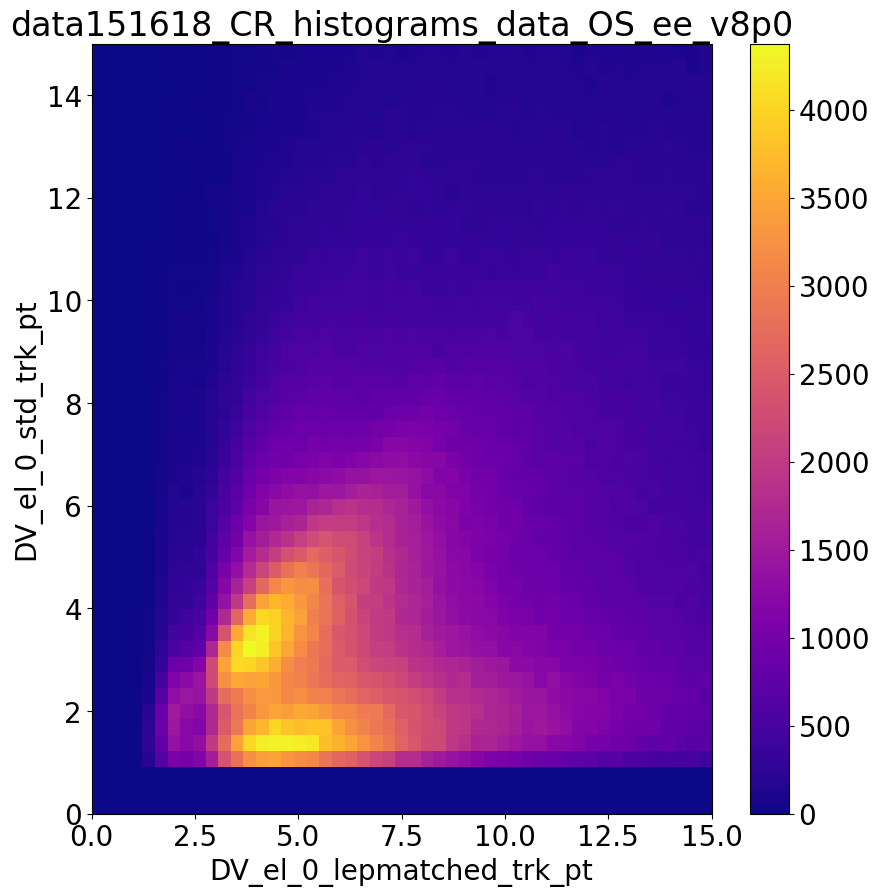

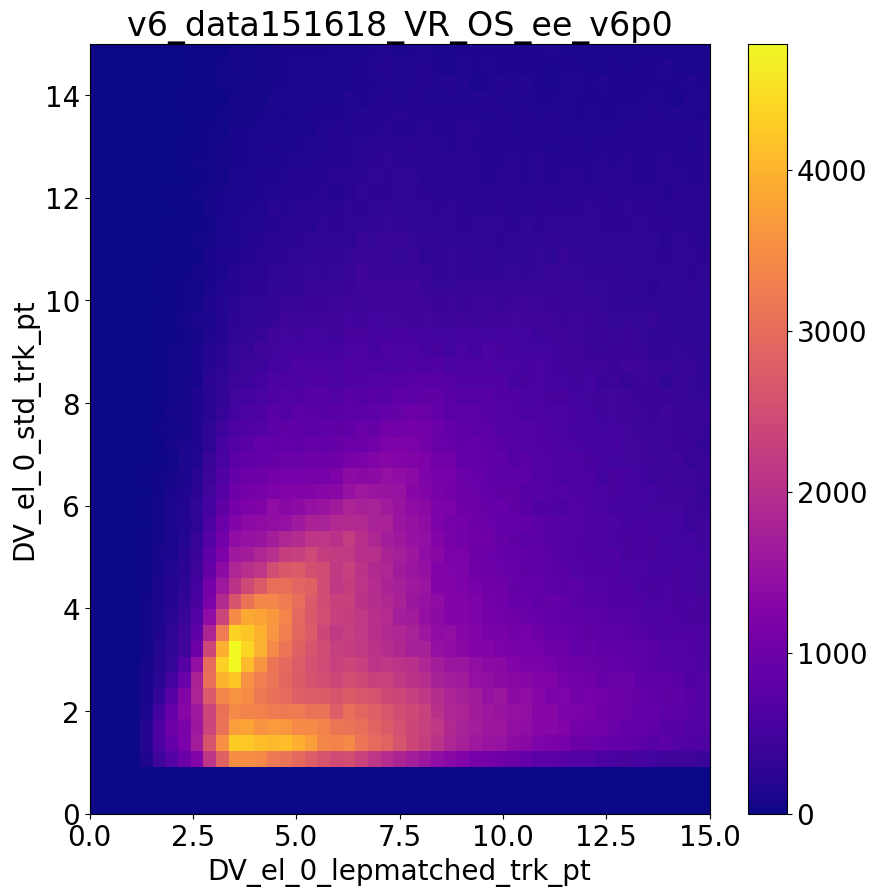

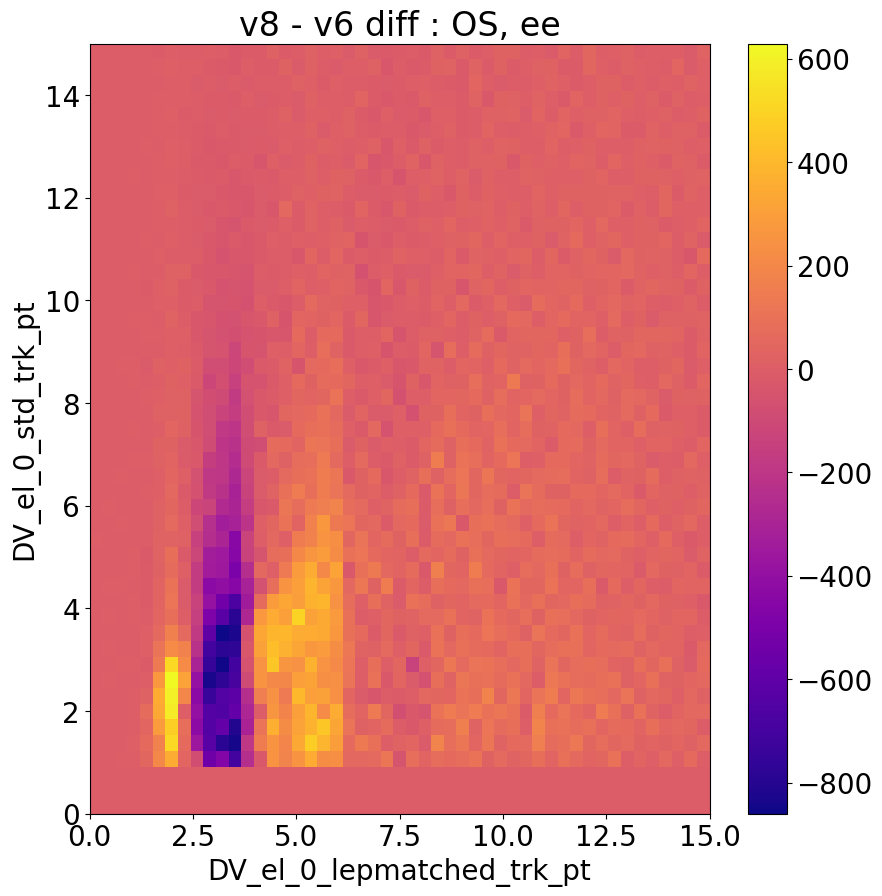

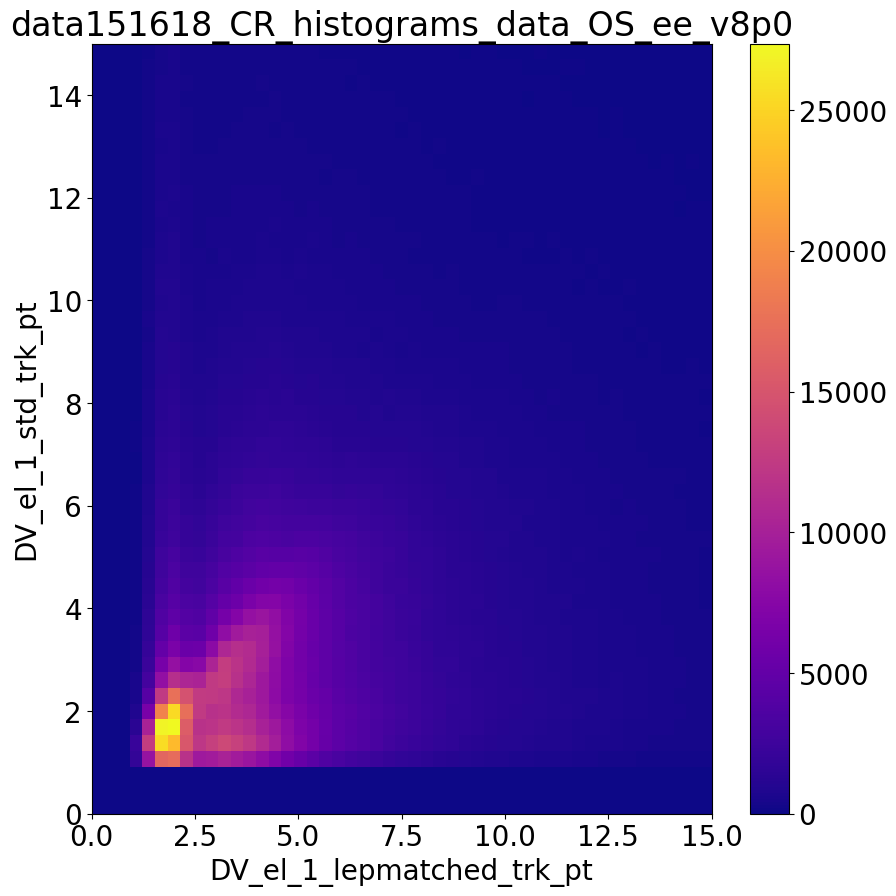

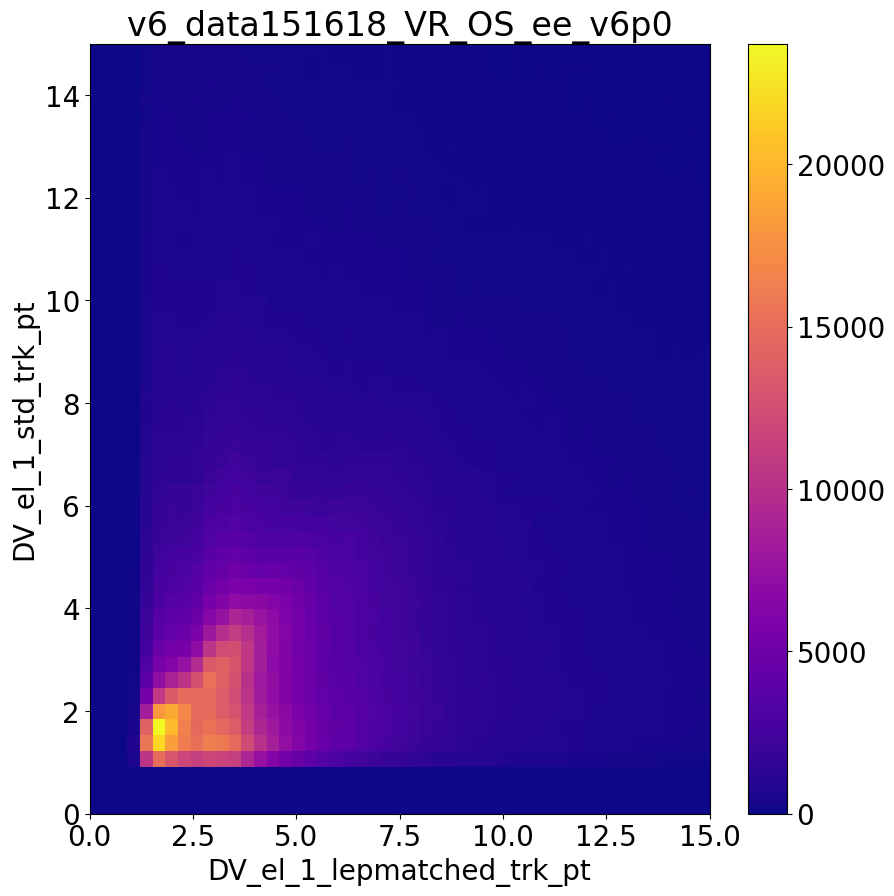

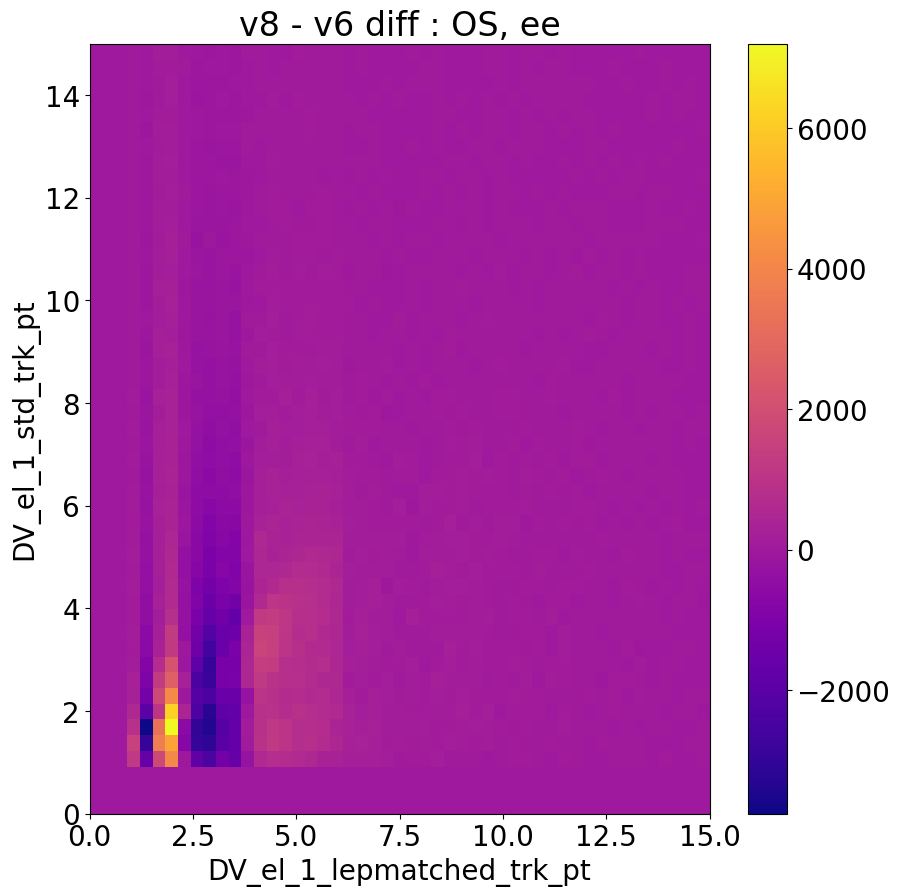

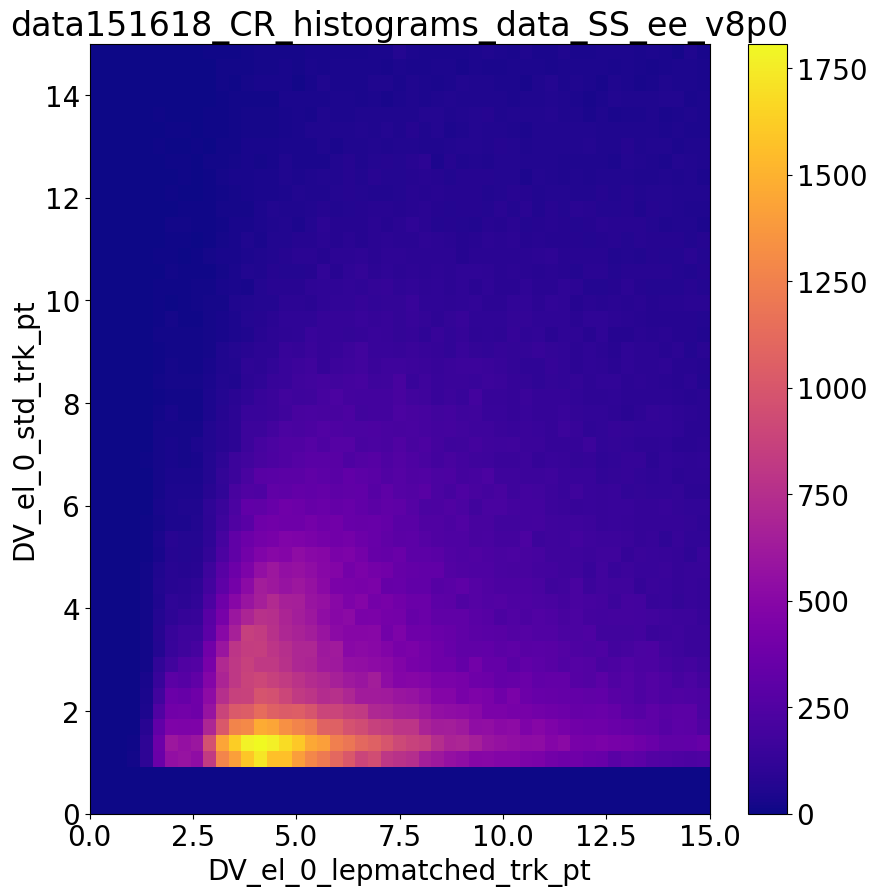

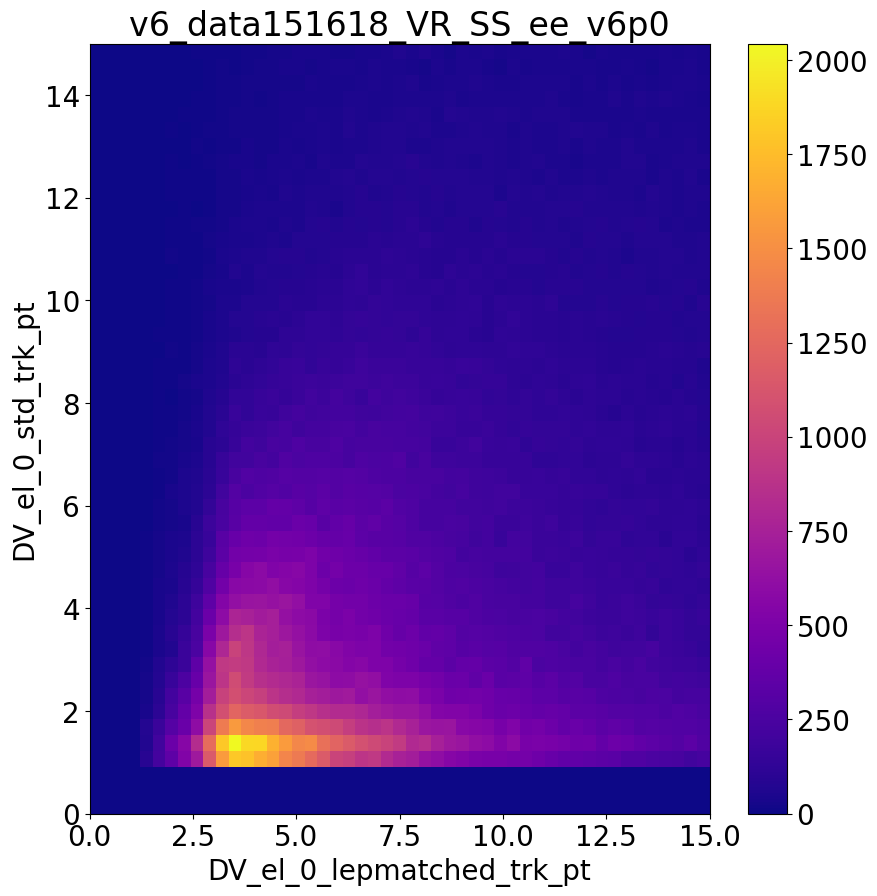

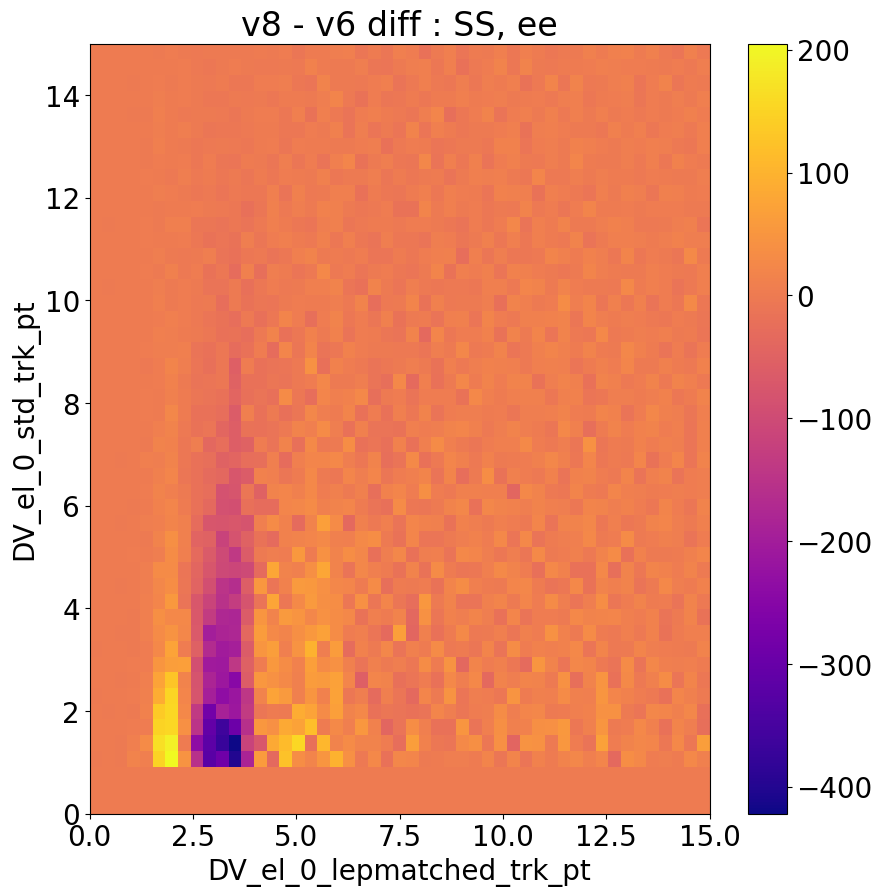

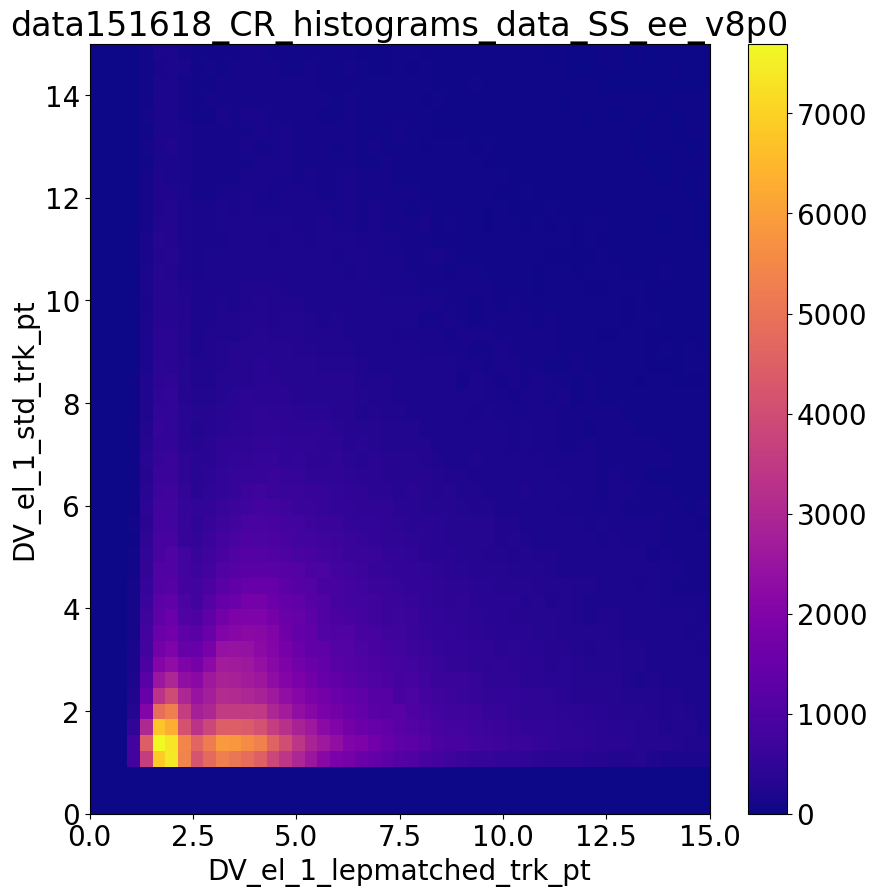

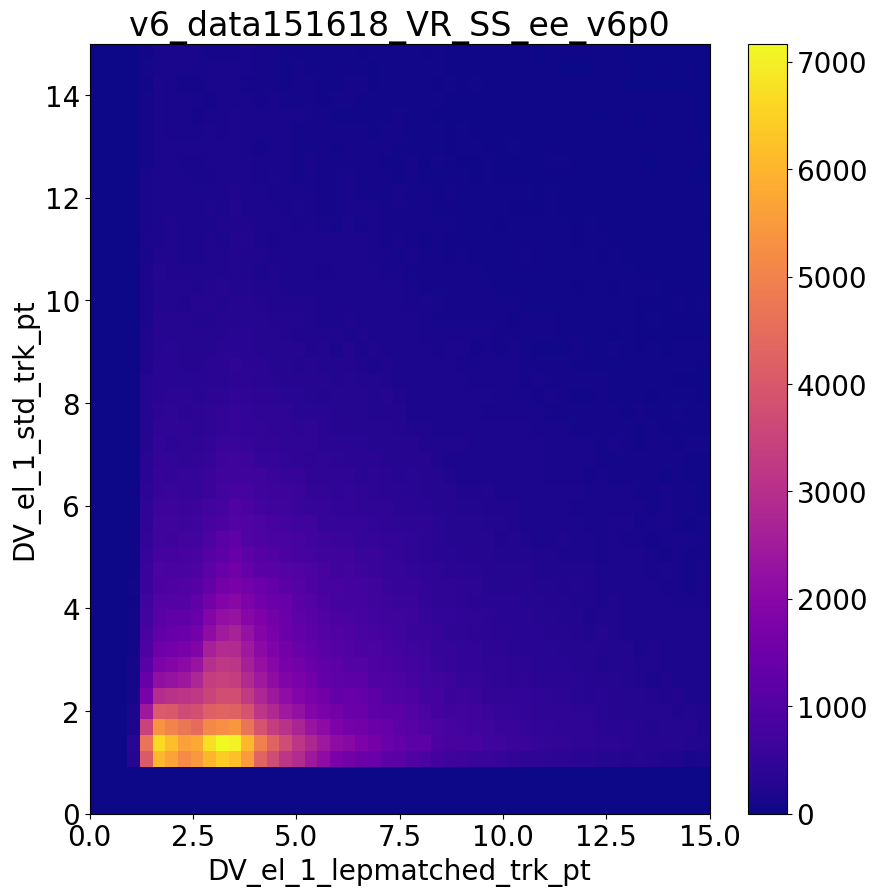

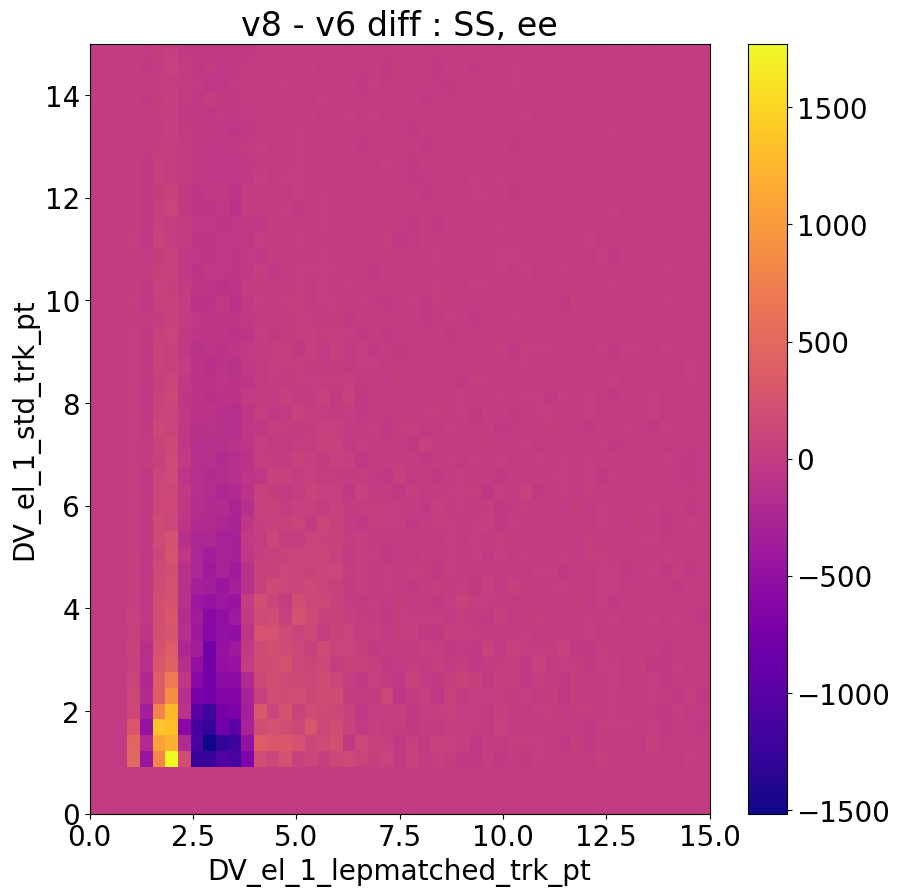

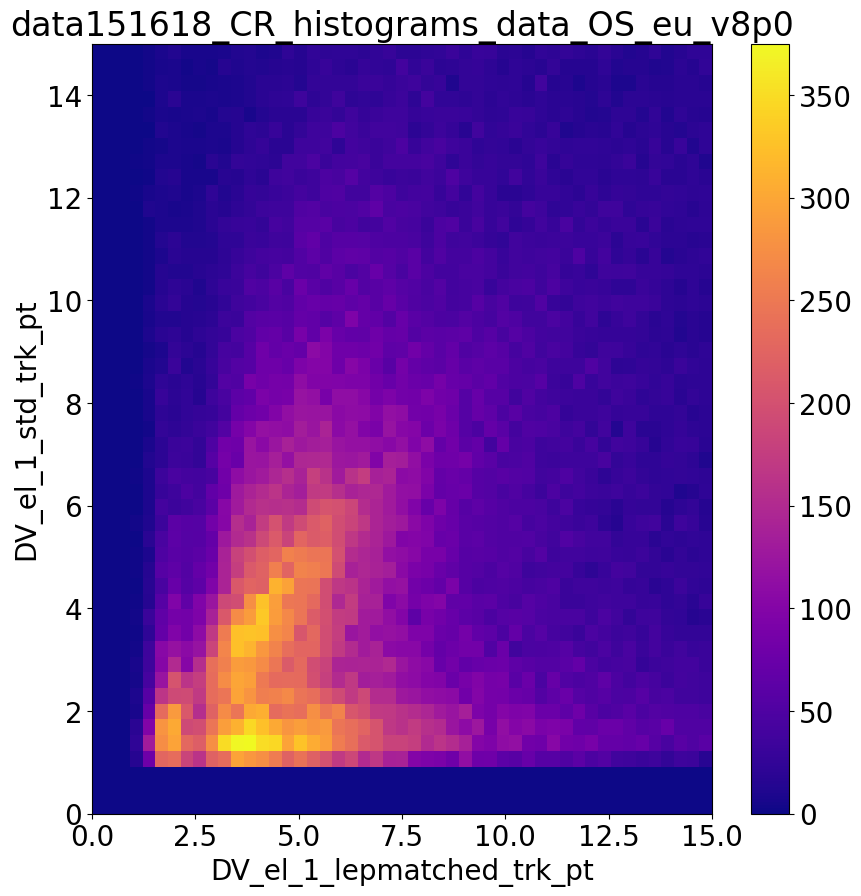

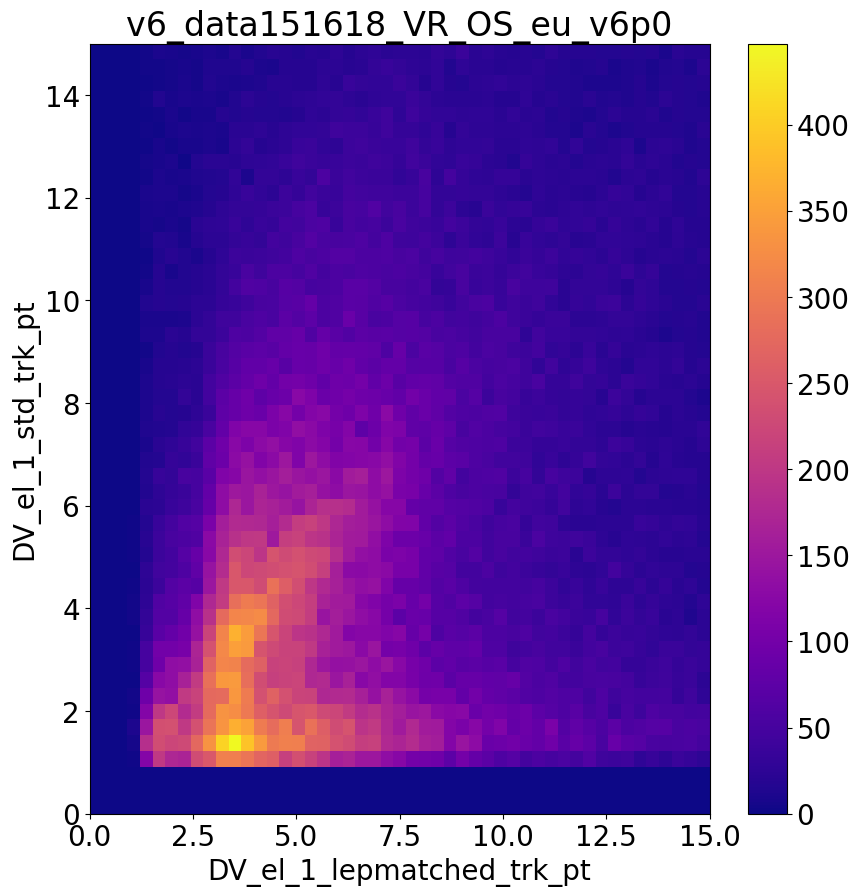

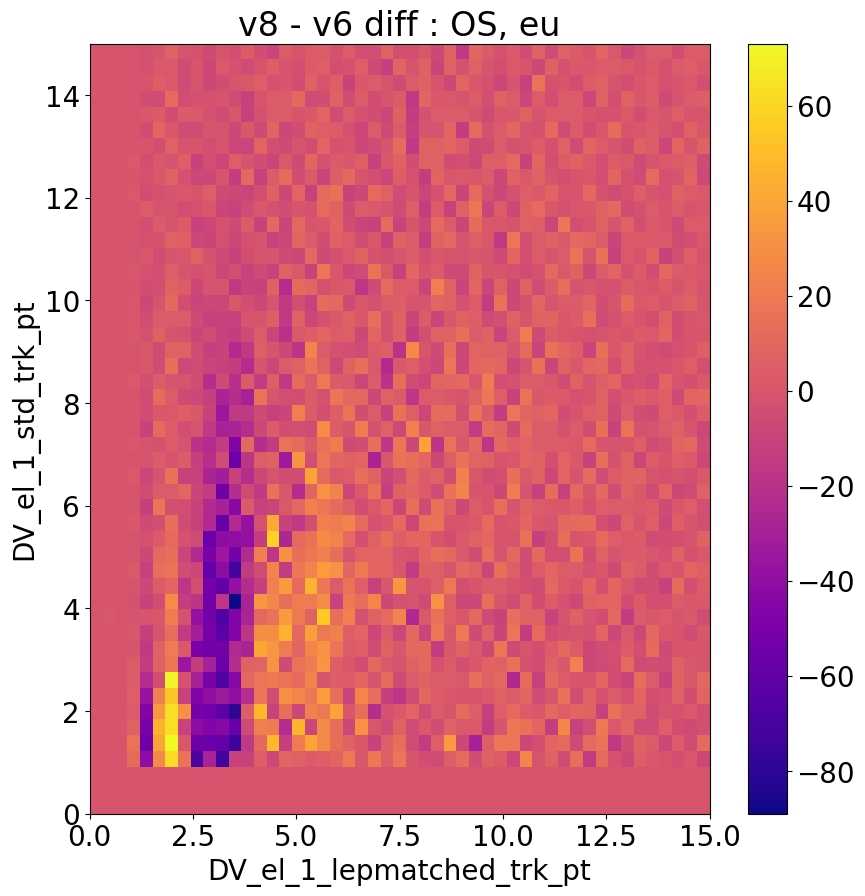

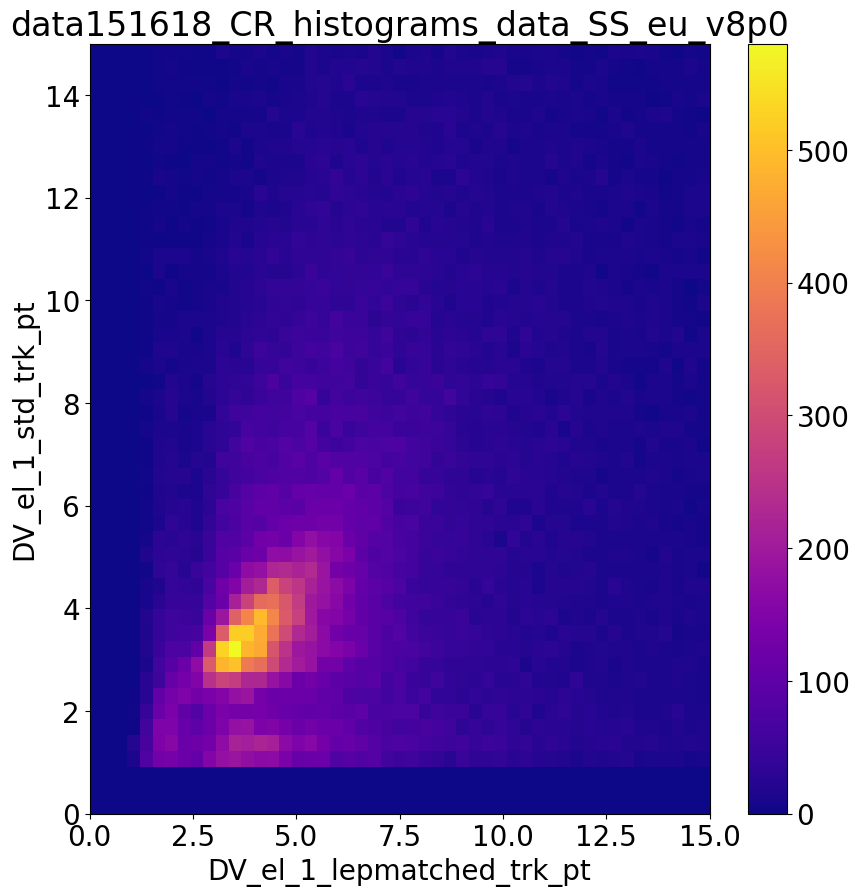

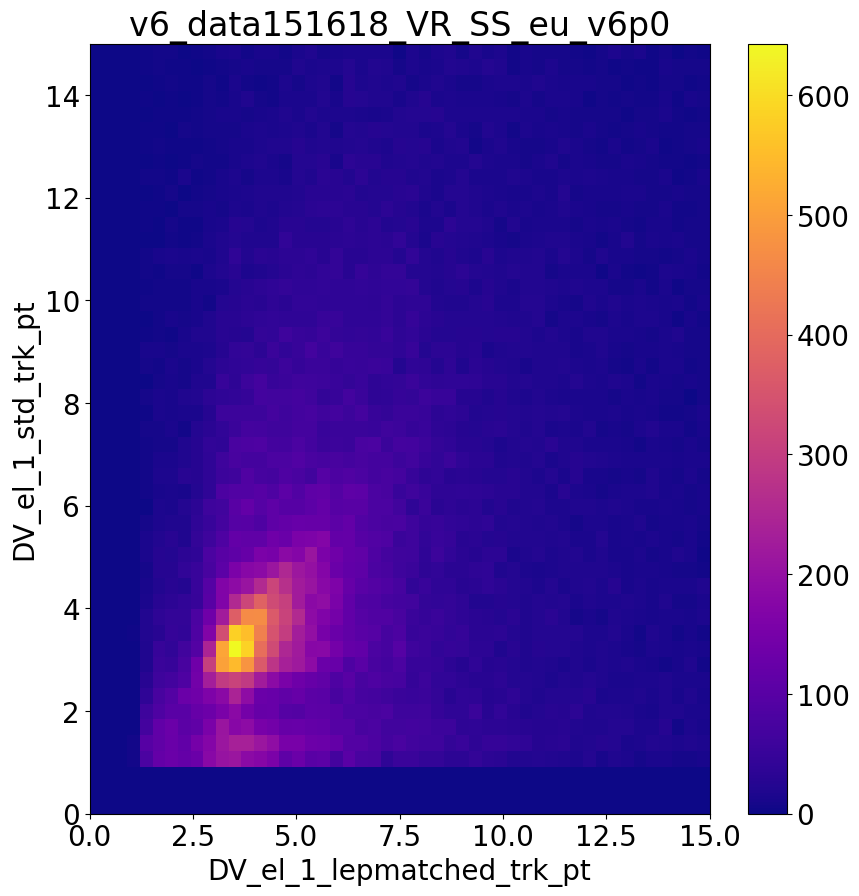

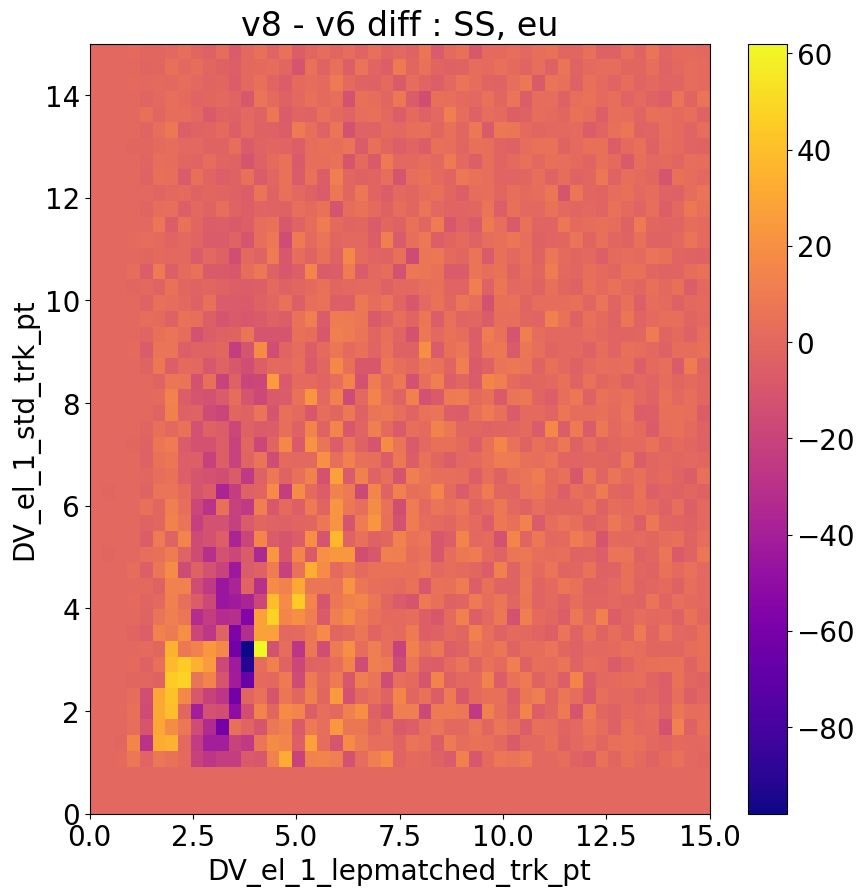

In [44]:
def h2d_diff(file1, file2, var1, var2, title):

    h2d_1 = pt_plot_2d(file1, var1, var2);
    h2d_2 = pt_plot_2d(file2, var1, var2);
    h2d_diff = h2d_1[0] - h2d_2[0]

    plt.figure(figsize=[10,10])
    plt.pcolormesh(h2d_1[1], h2d_1[2], h2d_diff.T)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.colorbar()
    plt.title(title)
    plt.savefig(f'{title} {var1} {var2}.png', dpi=300)
    plt.show();

h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root',
         '/data/newhouse/HNL/histograms/v6_data151618_VR_OS_ee.root',
         'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt',
          'v8 - v6 diff : OS, ee');

h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root',
         '/data/newhouse/HNL/histograms/v6_data151618_VR_OS_ee.root',
         'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt',
          'v8 - v6 diff : OS, ee');

h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_SS_ee.root',
         '/data/newhouse/HNL/histograms/v6_data151618_VR_SS_ee.root',
         'DV_el_0_lepmatched_trk_pt', 'DV_el_0_std_trk_pt',
          'v8 - v6 diff : SS, ee');

h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_SS_ee.root',
         '/data/newhouse/HNL/histograms/v6_data151618_VR_SS_ee.root',
         'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt',
          'v8 - v6 diff : SS, ee');


h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_eu.root',
         '/data/newhouse/HNL/histograms/v6_data151618_VR_OS_eu.root',
         'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt',
          'v8 - v6 diff : OS, eu');

h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_SS_eu.root',
         '/data/newhouse/HNL/histograms/v6_data151618_VR_SS_eu.root',
         'DV_el_1_lepmatched_trk_pt', 'DV_el_1_std_trk_pt',
          'v8 - v6 diff : SS, eu');

In [26]:
h2d_1[1]

array([ 0.        ,  0.30612245,  0.6122449 ,  0.91836735,  1.2244898 ,
        1.53061224,  1.83673469,  2.14285714,  2.44897959,  2.75510204,
        3.06122449,  3.36734694,  3.67346939,  3.97959184,  4.28571429,
        4.59183673,  4.89795918,  5.20408163,  5.51020408,  5.81632653,
        6.12244898,  6.42857143,  6.73469388,  7.04081633,  7.34693878,
        7.65306122,  7.95918367,  8.26530612,  8.57142857,  8.87755102,
        9.18367347,  9.48979592,  9.79591837, 10.10204082, 10.40816327,
       10.71428571, 11.02040816, 11.32653061, 11.63265306, 11.93877551,
       12.24489796, 12.55102041, 12.85714286, 13.16326531, 13.46938776,
       13.7755102 , 14.08163265, 14.3877551 , 14.69387755, 15.        ])

0.0